# 고급회귀분석 실습 CH11

SEOYEON CHOI  
2022-12-05

chapter 11 변수선택

# 변수선택

In [1]:
dt <- data.frame(
  
  x1 = c(7,1,11,11,7,11,3,1,2,21,1,11,10),
  x2 = c(26,29,56,31,52,55,71,31,54,47,40,66,68),
  x3 = c(6,15,8,8,6,9,17,22,18,4,23,9,8),
  x4 = c(60,52,20,47,33,22,6,44,22,26,34,12,12),
  y  = c(78.5,74.3,104.3,87.6,95.9,109.2,102.7,72.5,93.1,115.9,83.8,113.3,109.4)
)

산점도

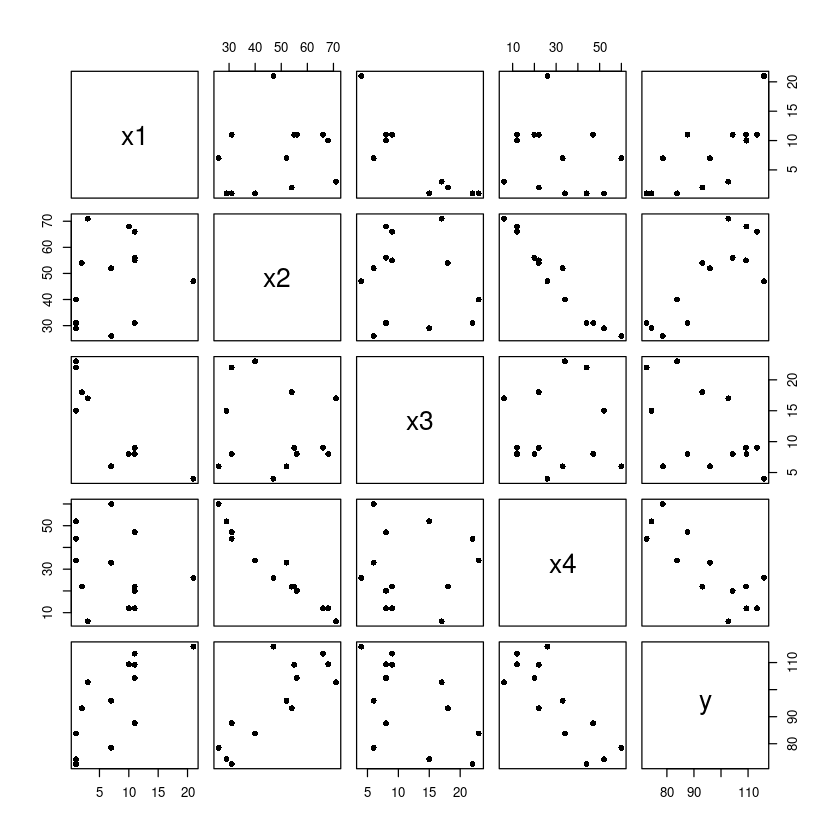

In [2]:
pairs(dt, pch=16)

x2/x4 음의 상관관계 보임 등 확인

상관게수

In [3]:
cor(dt)

x1/x3 cor 크고

y와의 상관계수 중 x4가 가장 큼

Full model

In [4]:
m <- lm(y~., dt)  ##FM

In [5]:
summary(m)


Call:
lm(formula = y ~ ., data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1750 -1.6709  0.2508  1.3783  3.9254 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  62.4054    70.0710   0.891   0.3991  
x1            1.5511     0.7448   2.083   0.0708 .
x2            0.5102     0.7238   0.705   0.5009  
x3            0.1019     0.7547   0.135   0.8959  
x4           -0.1441     0.7091  -0.203   0.8441  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.446 on 8 degrees of freedom
Multiple R-squared:  0.9824,    Adjusted R-squared:  0.9736 
F-statistic: 111.5 on 4 and 8 DF,  p-value: 4.756e-07

x1만 유의함, 나머지는 유의하지 않음

모형이 복잡해지면 분산이 커져서 유의미하지 않다는 결과 나올 수도

아니면 선형변수간 상관관계가 높을때 (모형은 유의하지만 변수가 유의하지
않음-\> 다중공선성 존재, 변수선택과정 필요

t value squre = F value -\> 가장 작은 거 찾았더니 x3, x3이 가장 유의하지
않음 -\> 제거

In [6]:
anova(m)

### 후진제거법

In [7]:
summary(m) #x3 제거


Call:
lm(formula = y ~ ., data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1750 -1.6709  0.2508  1.3783  3.9254 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  62.4054    70.0710   0.891   0.3991  
x1            1.5511     0.7448   2.083   0.0708 .
x2            0.5102     0.7238   0.705   0.5009  
x3            0.1019     0.7547   0.135   0.8959  
x4           -0.1441     0.7091  -0.203   0.8441  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.446 on 8 degrees of freedom
Multiple R-squared:  0.9824,    Adjusted R-squared:  0.9736 
F-statistic: 111.5 on 4 and 8 DF,  p-value: 4.756e-07

In [56]:
2.083^2

4.338889

In [8]:
drop1(m, test = "F")

각 값은 해당 변수가 없을떄의 결과임

RSS는 SSE임 - 47.86364 모두 포함할 떄의 SSE, - 각 줄은 해당 변수가 없을
때의 SSE값임(차이가 클수록 의미있는 변수) - 25.9509114+
47.86364=73.81455

AIC

F value 부분 f 검정의 f 값

In [9]:
m1 <- update(m, ~ . -x3)

In [10]:
summary(m1)  #x4 제거


Call:
lm(formula = y ~ x1 + x2 + x4, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0919 -1.8016  0.2562  1.2818  3.8982 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  71.6483    14.1424   5.066 0.000675 ***
x1            1.4519     0.1170  12.410 5.78e-07 ***
x2            0.4161     0.1856   2.242 0.051687 .  
x4           -0.2365     0.1733  -1.365 0.205395    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.309 on 9 degrees of freedom
Multiple R-squared:  0.9823,    Adjusted R-squared:  0.9764 
F-statistic: 166.8 on 3 and 9 DF,  p-value: 3.323e-08

부분 F 검정, t value 가장 작은 것은 x4임

alpha_B = 0.05라 놓고 p값중 이보다 크거나 작은 거 찾기

In [11]:
drop1(m1, test = "F")

In [12]:
m2 <- update(m1, ~ . -x4)

In [13]:
summary(m2)  #x4 제거


Call:
lm(formula = y ~ x1 + x2, data = dt)

Residuals:
   Min     1Q Median     3Q    Max 
-2.893 -1.574 -1.302  1.363  4.048 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 52.57735    2.28617   23.00 5.46e-10 ***
x1           1.46831    0.12130   12.11 2.69e-07 ***
x2           0.66225    0.04585   14.44 5.03e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.406 on 10 degrees of freedom
Multiple R-squared:  0.9787,    Adjusted R-squared:  0.9744 
F-statistic: 229.5 on 2 and 10 DF,  p-value: 4.407e-09

t value 보니 x1이 가장 작지만 유의확률 작음 제거 불가, 과정 멈추기

In [14]:
drop1(m2, test = "F")

In [15]:
##### 전진선택법 
m0 = lm(y ~ 1, data = dt)

In [16]:
add1(m0, 
     scope = y ~  x1 + x2 + x3+ x4,
     test = "F")  ## x4추가

절편만 있는 모형에서 시작

RSS는 SST로 시작(설명 변수 없는 SSE니까) 사실 SSE

x4의 f value가장 큼

In [17]:
m1 <- update(m0, ~ . +x4)

In [18]:
summary(m1)


Call:
lm(formula = y ~ x4, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.589  -8.228   1.495   4.726  17.524 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 117.5679     5.2622  22.342 1.62e-10 ***
x4           -0.7382     0.1546  -4.775 0.000576 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.964 on 11 degrees of freedom
Multiple R-squared:  0.6745,    Adjusted R-squared:  0.645 
F-statistic:  22.8 on 1 and 11 DF,  p-value: 0.0005762

In [19]:
add1(m1, 
     scope = y ~  x1 + x2 + x3+ x4,
     test = "F")  ## x1추가

In [20]:
m2 <- update(m1, ~ . +x1)

In [21]:
summary(m2)


Call:
lm(formula = y ~ x4 + x1, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0234 -1.4737  0.1371  1.7305  3.7701 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 103.09738    2.12398   48.54 3.32e-13 ***
x4           -0.61395    0.04864  -12.62 1.81e-07 ***
x1            1.43996    0.13842   10.40 1.11e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.734 on 10 degrees of freedom
Multiple R-squared:  0.9725,    Adjusted R-squared:  0.967 
F-statistic: 176.6 on 2 and 10 DF,  p-value: 1.581e-08

In [22]:
add1(m2, 
     scope = y ~  x1 + x2 + x3+ x4,
     test = "F")  ## stop

모두 0.05보다 p값이 큼, 멈추자

## 단계적선택법

In [23]:
m0 = lm(y ~ 1, data = dt)

In [24]:
add1(m0, 
     scope = y ~  x1 + x2 + x3+ x4,
     test = "F")  ## x4추가

In [25]:
m1 <- update(m0, ~ . +x4)

In [26]:
summary(m1)


Call:
lm(formula = y ~ x4, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.589  -8.228   1.495   4.726  17.524 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 117.5679     5.2622  22.342 1.62e-10 ***
x4           -0.7382     0.1546  -4.775 0.000576 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.964 on 11 degrees of freedom
Multiple R-squared:  0.6745,    Adjusted R-squared:  0.645 
F-statistic:  22.8 on 1 and 11 DF,  p-value: 0.0005762

In [27]:
add1(m1, 
     scope = y ~  x1 + x2 + x3+ x4,
     test = "F")  ## x1추가

In [28]:
m2 <- update(m1, ~ . +x1)

In [29]:
summary(m2)  #제거 없음


Call:
lm(formula = y ~ x4 + x1, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0234 -1.4737  0.1371  1.7305  3.7701 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 103.09738    2.12398   48.54 3.32e-13 ***
x4           -0.61395    0.04864  -12.62 1.81e-07 ***
x1            1.43996    0.13842   10.40 1.11e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.734 on 10 degrees of freedom
Multiple R-squared:  0.9725,    Adjusted R-squared:  0.967 
F-statistic: 176.6 on 2 and 10 DF,  p-value: 1.581e-08

In [30]:
add1(m2, 
     scope = y ~  x1 + x2 + x3+ x4,
     test = "F")  ## x2추가

In [31]:
m3 <- update(m2, ~ . +x2)

In [32]:
summary(m3)  #x4 제거


Call:
lm(formula = y ~ x4 + x1 + x2, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0919 -1.8016  0.2562  1.2818  3.8982 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  71.6483    14.1424   5.066 0.000675 ***
x4           -0.2365     0.1733  -1.365 0.205395    
x1            1.4519     0.1170  12.410 5.78e-07 ***
x2            0.4161     0.1856   2.242 0.051687 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.309 on 9 degrees of freedom
Multiple R-squared:  0.9823,    Adjusted R-squared:  0.9764 
F-statistic: 166.8 on 3 and 9 DF,  p-value: 3.323e-08

In [33]:
m4 <- update(m3, ~ . -x4)

In [34]:
add1(m4, 
     scope = y ~  x1 + x2 + x3+ x4,
     test = "F") #stop

In [35]:
#install.packages("leaps")

In [36]:
library(leaps)

In [37]:
fit<-regsubsets(y~., data=dt, nbest=1,nvmax=4,
                # method=c("exhaustive","backward", 
                #          "forward", "seqrep")
                method='forward',
                )

full model, nbest = 1개만 추가 nvmax 최대 4개 포함 가능

In [38]:
a <- summary(fit)

In [39]:
str(a)

List of 8
 $ which : logi [1:4, 1:5] TRUE TRUE TRUE TRUE FALSE TRUE ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:4] "1" "2" "3" "4"
  .. ..$ : chr [1:5] "(Intercept)" "x1" "x2" "x3" ...
 $ rsq   : num [1:4] 0.675 0.972 0.982 0.982
 $ rss   : num [1:4] 883.9 74.8 48 47.9
 $ adjr2 : num [1:4] 0.645 0.967 0.976 0.974
 $ cp    : num [1:4] 138.73 5.5 3.02 5
 $ bic   : num [1:4] -9.46 -39.01 -42.21 -39.68
 $ outmat: chr [1:4, 1:4] " " "*" "*" "*" ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:4] "1  ( 1 )" "2  ( 1 )" "3  ( 1 )" "4  ( 1 )"
  .. ..$ : chr [1:4] "x1" "x2" "x3" "x4"
 $ obj   :List of 28
  ..$ np       : int 5
  ..$ nrbar    : int 10
  ..$ d        : num [1:5] 13 3362 390.2 154.7 10.5
  ..$ rbar     : num [1:10] 30 7.4615 48.1538 11.7692 -0.0863 ...
  ..$ thetab   : num [1:5] 95.423 -0.738 1.44 0.416 0.102
  ..$ first    : int 2
  ..$ last     : int 5
  ..$ vorder   : int [1:5] 1 5 2 3 4
  ..$ tol      : num [1:5] 1.80e-09 9.67e-08 2.36e-08 1.19e-07 3.72e-

In [40]:
with(summary(fit),
     round(cbind(which,rss,rsq,adjr2, cp, bic),3))

설명변수 하나 썼을때, 2개 썼을때,,, 선택되는 변수들

설명변수2개.3개일때 Radj별로 차이 없어서 BIC 기준으로 2번째 꺼 선택

cp \<= p+1(각 줄의 cp가 2,3,4,5보다 커야 함) -\> 2번째꺼 선택!

step- r 기본 함수

m은 꼭 full model로 적어주기

In [41]:
###Backward - AIC
model_back = step(m, direction = "backward")

Start:  AIC=26.94
y ~ x1 + x2 + x3 + x4

       Df Sum of Sq    RSS    AIC
- x3    1    0.1091 47.973 24.974
- x4    1    0.2470 48.111 25.011
- x2    1    2.9725 50.836 25.728
<none>              47.864 26.944
- x1    1   25.9509 73.815 30.576

Step:  AIC=24.97
y ~ x1 + x2 + x4

       Df Sum of Sq    RSS    AIC
<none>               47.97 24.974
- x4    1      9.93  57.90 25.420
- x2    1     26.79  74.76 28.742
- x1    1    820.91 868.88 60.629

AIC 가장 작게하는 모형 기준으로 정렬되어 있음

24.97 가장 작아 최종 모형 결정됌

In [42]:
summary(model_back)


Call:
lm(formula = y ~ x1 + x2 + x4, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0919 -1.8016  0.2562  1.2818  3.8982 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  71.6483    14.1424   5.066 0.000675 ***
x1            1.4519     0.1170  12.410 5.78e-07 ***
x2            0.4161     0.1856   2.242 0.051687 .  
x4           -0.2365     0.1733  -1.365 0.205395    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.309 on 9 degrees of freedom
Multiple R-squared:  0.9823,    Adjusted R-squared:  0.9764 
F-statistic: 166.8 on 3 and 9 DF,  p-value: 3.323e-08

In [43]:
###Forward - AIC
model_forward = step(
  m0, 
  scope = y ~  x1 + x2 + x3+ x4, 
  direction = "forward")

Start:  AIC=71.44
y ~ 1

       Df Sum of Sq     RSS    AIC
+ x4    1   1831.90  883.87 58.852
+ x2    1   1809.43  906.34 59.178
+ x1    1   1450.08 1265.69 63.519
+ x3    1    776.36 1939.40 69.067
<none>              2715.76 71.444

Step:  AIC=58.85
y ~ x4

       Df Sum of Sq    RSS    AIC
+ x1    1    809.10  74.76 28.742
+ x3    1    708.13 175.74 39.853
<none>              883.87 58.852
+ x2    1     14.99 868.88 60.629

Step:  AIC=28.74
y ~ x4 + x1

       Df Sum of Sq    RSS    AIC
+ x2    1    26.789 47.973 24.974
+ x3    1    23.926 50.836 25.728
<none>              74.762 28.742

Step:  AIC=24.97
y ~ x4 + x1 + x2

       Df Sum of Sq    RSS    AIC
<none>              47.973 24.974
+ x3    1   0.10909 47.864 26.944

정해진 식에서 설명변수만 추가하고

In [44]:
summary(model_forward)


Call:
lm(formula = y ~ x4 + x1 + x2, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0919 -1.8016  0.2562  1.2818  3.8982 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  71.6483    14.1424   5.066 0.000675 ***
x4           -0.2365     0.1733  -1.365 0.205395    
x1            1.4519     0.1170  12.410 5.78e-07 ***
x2            0.4161     0.1856   2.242 0.051687 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.309 on 9 degrees of freedom
Multiple R-squared:  0.9823,    Adjusted R-squared:  0.9764 
F-statistic: 166.8 on 3 and 9 DF,  p-value: 3.323e-08

In [45]:
###Step - AIC
model_step = step(
  m0, 
  scope =  y ~  x1 + x2 + x3+ x4, 
  direction = "both")

Start:  AIC=71.44
y ~ 1

       Df Sum of Sq     RSS    AIC
+ x4    1   1831.90  883.87 58.852
+ x2    1   1809.43  906.34 59.178
+ x1    1   1450.08 1265.69 63.519
+ x3    1    776.36 1939.40 69.067
<none>              2715.76 71.444

Step:  AIC=58.85
y ~ x4

       Df Sum of Sq     RSS    AIC
+ x1    1    809.10   74.76 28.742
+ x3    1    708.13  175.74 39.853
<none>               883.87 58.852
+ x2    1     14.99  868.88 60.629
- x4    1   1831.90 2715.76 71.444

Step:  AIC=28.74
y ~ x4 + x1

       Df Sum of Sq     RSS    AIC
+ x2    1     26.79   47.97 24.974
+ x3    1     23.93   50.84 25.728
<none>                74.76 28.742
- x1    1    809.10  883.87 58.852
- x4    1   1190.92 1265.69 63.519

Step:  AIC=24.97
y ~ x4 + x1 + x2

       Df Sum of Sq    RSS    AIC
<none>               47.97 24.974
- x4    1      9.93  57.90 25.420
+ x3    1      0.11  47.86 26.944
- x2    1     26.79  74.76 28.742
- x1    1    820.91 868.88 60.629

In [46]:
summary(model_step)


Call:
lm(formula = y ~ x4 + x1 + x2, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0919 -1.8016  0.2562  1.2818  3.8982 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  71.6483    14.1424   5.066 0.000675 ***
x4           -0.2365     0.1733  -1.365 0.205395    
x1            1.4519     0.1170  12.410 5.78e-07 ***
x2            0.4161     0.1856   2.242 0.051687 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.309 on 9 degrees of freedom
Multiple R-squared:  0.9823,    Adjusted R-squared:  0.9764 
F-statistic: 166.8 on 3 and 9 DF,  p-value: 3.323e-08

In [47]:
str(mtcars)

'data.frame':   32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...

In [48]:
round(cor(mtcars),2)

In [49]:
m_full <- lm(mpg~., mtcars)

In [50]:
summary(m_full)


Call:
lm(formula = mpg ~ ., data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4506 -1.6044 -0.1196  1.2193  4.6271 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 12.30337   18.71788   0.657   0.5181  
cyl         -0.11144    1.04502  -0.107   0.9161  
disp         0.01334    0.01786   0.747   0.4635  
hp          -0.02148    0.02177  -0.987   0.3350  
drat         0.78711    1.63537   0.481   0.6353  
wt          -3.71530    1.89441  -1.961   0.0633 .
qsec         0.82104    0.73084   1.123   0.2739  
vs           0.31776    2.10451   0.151   0.8814  
am           2.52023    2.05665   1.225   0.2340  
gear         0.65541    1.49326   0.439   0.6652  
carb        -0.19942    0.82875  -0.241   0.8122  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.65 on 21 degrees of freedom
Multiple R-squared:  0.869, Adjusted R-squared:  0.8066 
F-statistic: 13.93 on 10 and 21 DF,  p-value: 3.793e-07

모형은 유의한데 변수들은 유의하지 않아 다중공선성 의심

In [51]:
fit<-regsubsets(mpg~., data=mtcars, nbest=1,nvmax=9,
                # method=c("exhaustive","backward", "forward", "seqrep")
                method='exhaustive',
)

변수 9개 이용 best 1개만 뽑기

In [52]:
summary(fit)

Subset selection object
Call: regsubsets.formula(mpg ~ ., data = mtcars, nbest = 1, nvmax = 9, 
    method = "exhaustive", )
10 Variables  (and intercept)
     Forced in Forced out
cyl      FALSE      FALSE
disp     FALSE      FALSE
hp       FALSE      FALSE
drat     FALSE      FALSE
wt       FALSE      FALSE
qsec     FALSE      FALSE
vs       FALSE      FALSE
am       FALSE      FALSE
gear     FALSE      FALSE
carb     FALSE      FALSE
1 subsets of each size up to 9
Selection Algorithm: exhaustive
         cyl disp hp  drat wt  qsec vs  am  gear carb
1  ( 1 ) " " " "  " " " "  "*" " "  " " " " " "  " " 
2  ( 1 ) "*" " "  " " " "  "*" " "  " " " " " "  " " 
3  ( 1 ) " " " "  " " " "  "*" "*"  " " "*" " "  " " 
4  ( 1 ) " " " "  "*" " "  "*" "*"  " " "*" " "  " " 
5  ( 1 ) " " "*"  "*" " "  "*" "*"  " " "*" " "  " " 
6  ( 1 ) " " "*"  "*" "*"  "*" "*"  " " "*" " "  " " 
7  ( 1 ) " " "*"  "*" "*"  "*" "*"  " " "*" "*"  " " 
8  ( 1 ) " " "*"  "*" "*"  "*" "*"  " " "*" "*"  "*" 
9  ( 1 ) "

In [53]:
with(summary(fit),
     round(cbind(which,rss,rsq,adjr2, cp, bic),3))

3번째 줄이 cp 가장 작음

rss = sse

3,4,5 들이 좋은 모형이라 할 수 있다.

BIC -46.773(3번째)가 가장 큼 절댓값으로

4번이 좋은 모형으로 본다면?

In [54]:
fit_4 <- lm(mpg~hp+wt+qsec+am, mtcars)

In [55]:
summary(fit_4)


Call:
lm(formula = mpg ~ hp + wt + qsec + am, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4975 -1.5902 -0.1122  1.1795  4.5404 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 17.44019    9.31887   1.871  0.07215 . 
hp          -0.01765    0.01415  -1.247  0.22309   
wt          -3.23810    0.88990  -3.639  0.00114 **
qsec         0.81060    0.43887   1.847  0.07573 . 
am           2.92550    1.39715   2.094  0.04579 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.435 on 27 degrees of freedom
Multiple R-squared:  0.8579,    Adjusted R-squared:  0.8368 
F-statistic: 40.74 on 4 and 27 DF,  p-value: 4.589e-11